## Relatório de Análise das Lojas

**Introdução:**
O objetivo deste relatório é analisar o desempenho de quatro lojas distintas (Loja 01, Loja 02, Loja 03 e Loja 04) a partir de um conjunto de métricas estratégicas. A análise abrange os seguintes aspectos: faturamento total, vendas por categoria de produto, avaliação dos clientes, produtos mais e menos vendidos e custo médio de frete. Com base nessas informações, será indicada qual loja o Senhor João deve considerar para venda, considerando eficiência operacional, satisfação dos clientes e potencial de lucratividade.

Importando os dados e criando a tabela conjunta de todos os dados.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 01'
loja2['Loja'] = 'Loja 02'
loja3['Loja'] = 'Loja 03'
loja4['Loja'] = 'Loja 04'

tabela_lojas = pd.concat([loja, loja2, loja3, loja4])


## Total de faturamento das lojas


      Loja  Faturamento
0  Loja 01   1534509.12
1  Loja 02   1488459.06
2  Loja 03   1464025.03
3  Loja 04   1384497.58


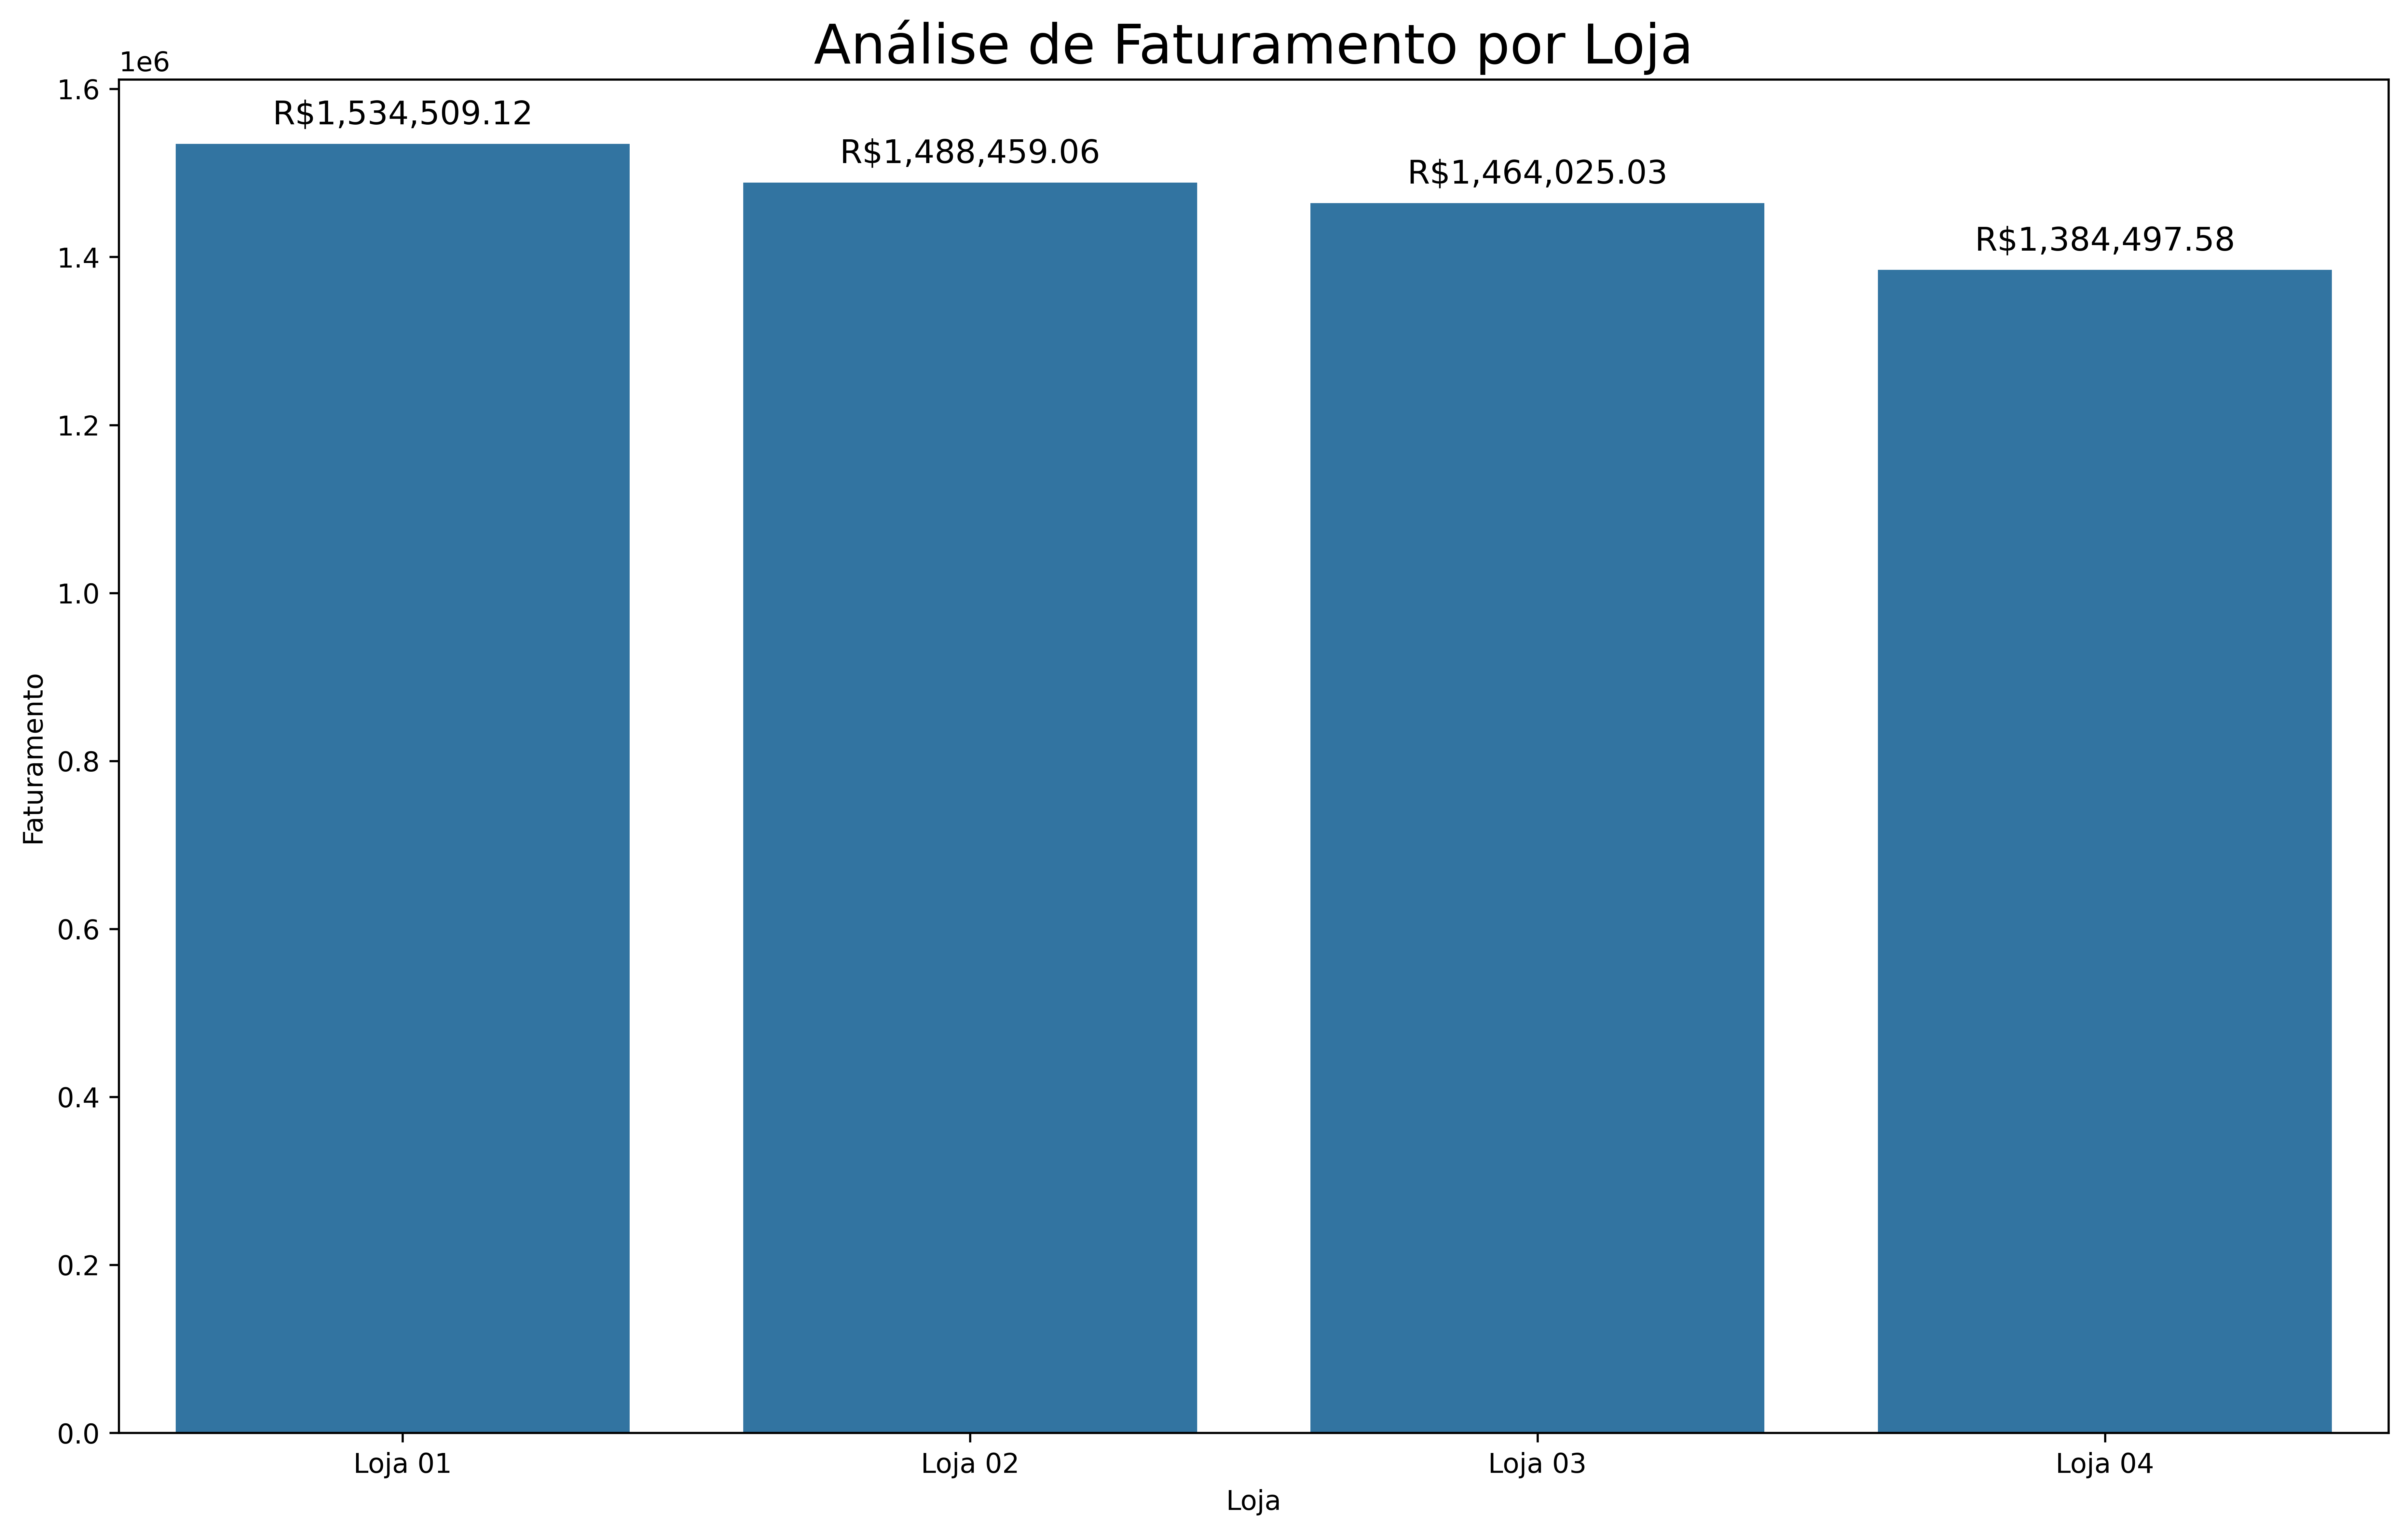

In [11]:
#Total faturamento
faturamento01 = tabela_lojas.groupby(['Loja']) ['Preço'].sum().reset_index(name='Faturamento')
print(faturamento01)

plt.figure(figsize=(15,9), dpi = 600)
graf_faturamento = sns.barplot(data=faturamento01, x='Loja', y='Faturamento')
for index, row in faturamento01.iterrows():
    plt.text(index, row['Faturamento'] + 0.01 * faturamento01['Faturamento'].max(),
             f"R${row['Faturamento']:,.2f}",
             ha='center', va='bottom', fontsize=12)

plt.title('Análise de Faturamento por Loja',fontsize=20)
plt.show()

## Quantidade de produtos vendidos por categoria em cada loja.

In [12]:
categorias = tabela_lojas.groupby(['Loja', 'Categoria do Produto'])['Produto'] \
                                .count().reset_index(name='Quantidade')
categorias = categorias.sort_values(by=['Loja', 'Quantidade'],  ascending=[True, False]).reset_index(drop=True)

categorias

,Loja,Categoria do Produto,Quantidade
0,Loja 01,moveis,465
1,Loja 01,eletronicos,448
2,Loja 01,brinquedos,324
3,Loja 01,eletrodomesticos,312
4,Loja 01,esporte e lazer,284
5,Loja 01,instrumentos musicais,182
6,Loja 01,livros,173
7,Loja 01,utilidades domesticas,171
8,Loja 02,moveis,442
9,Loja 02,eletronicos,422


## Média das avaliações dos clientes para cada loja.



      Loja  Média Avaliação
0  Loja 01         3.976685
1  Loja 02         4.037304
2  Loja 03         4.048326
3  Loja 04         3.995759


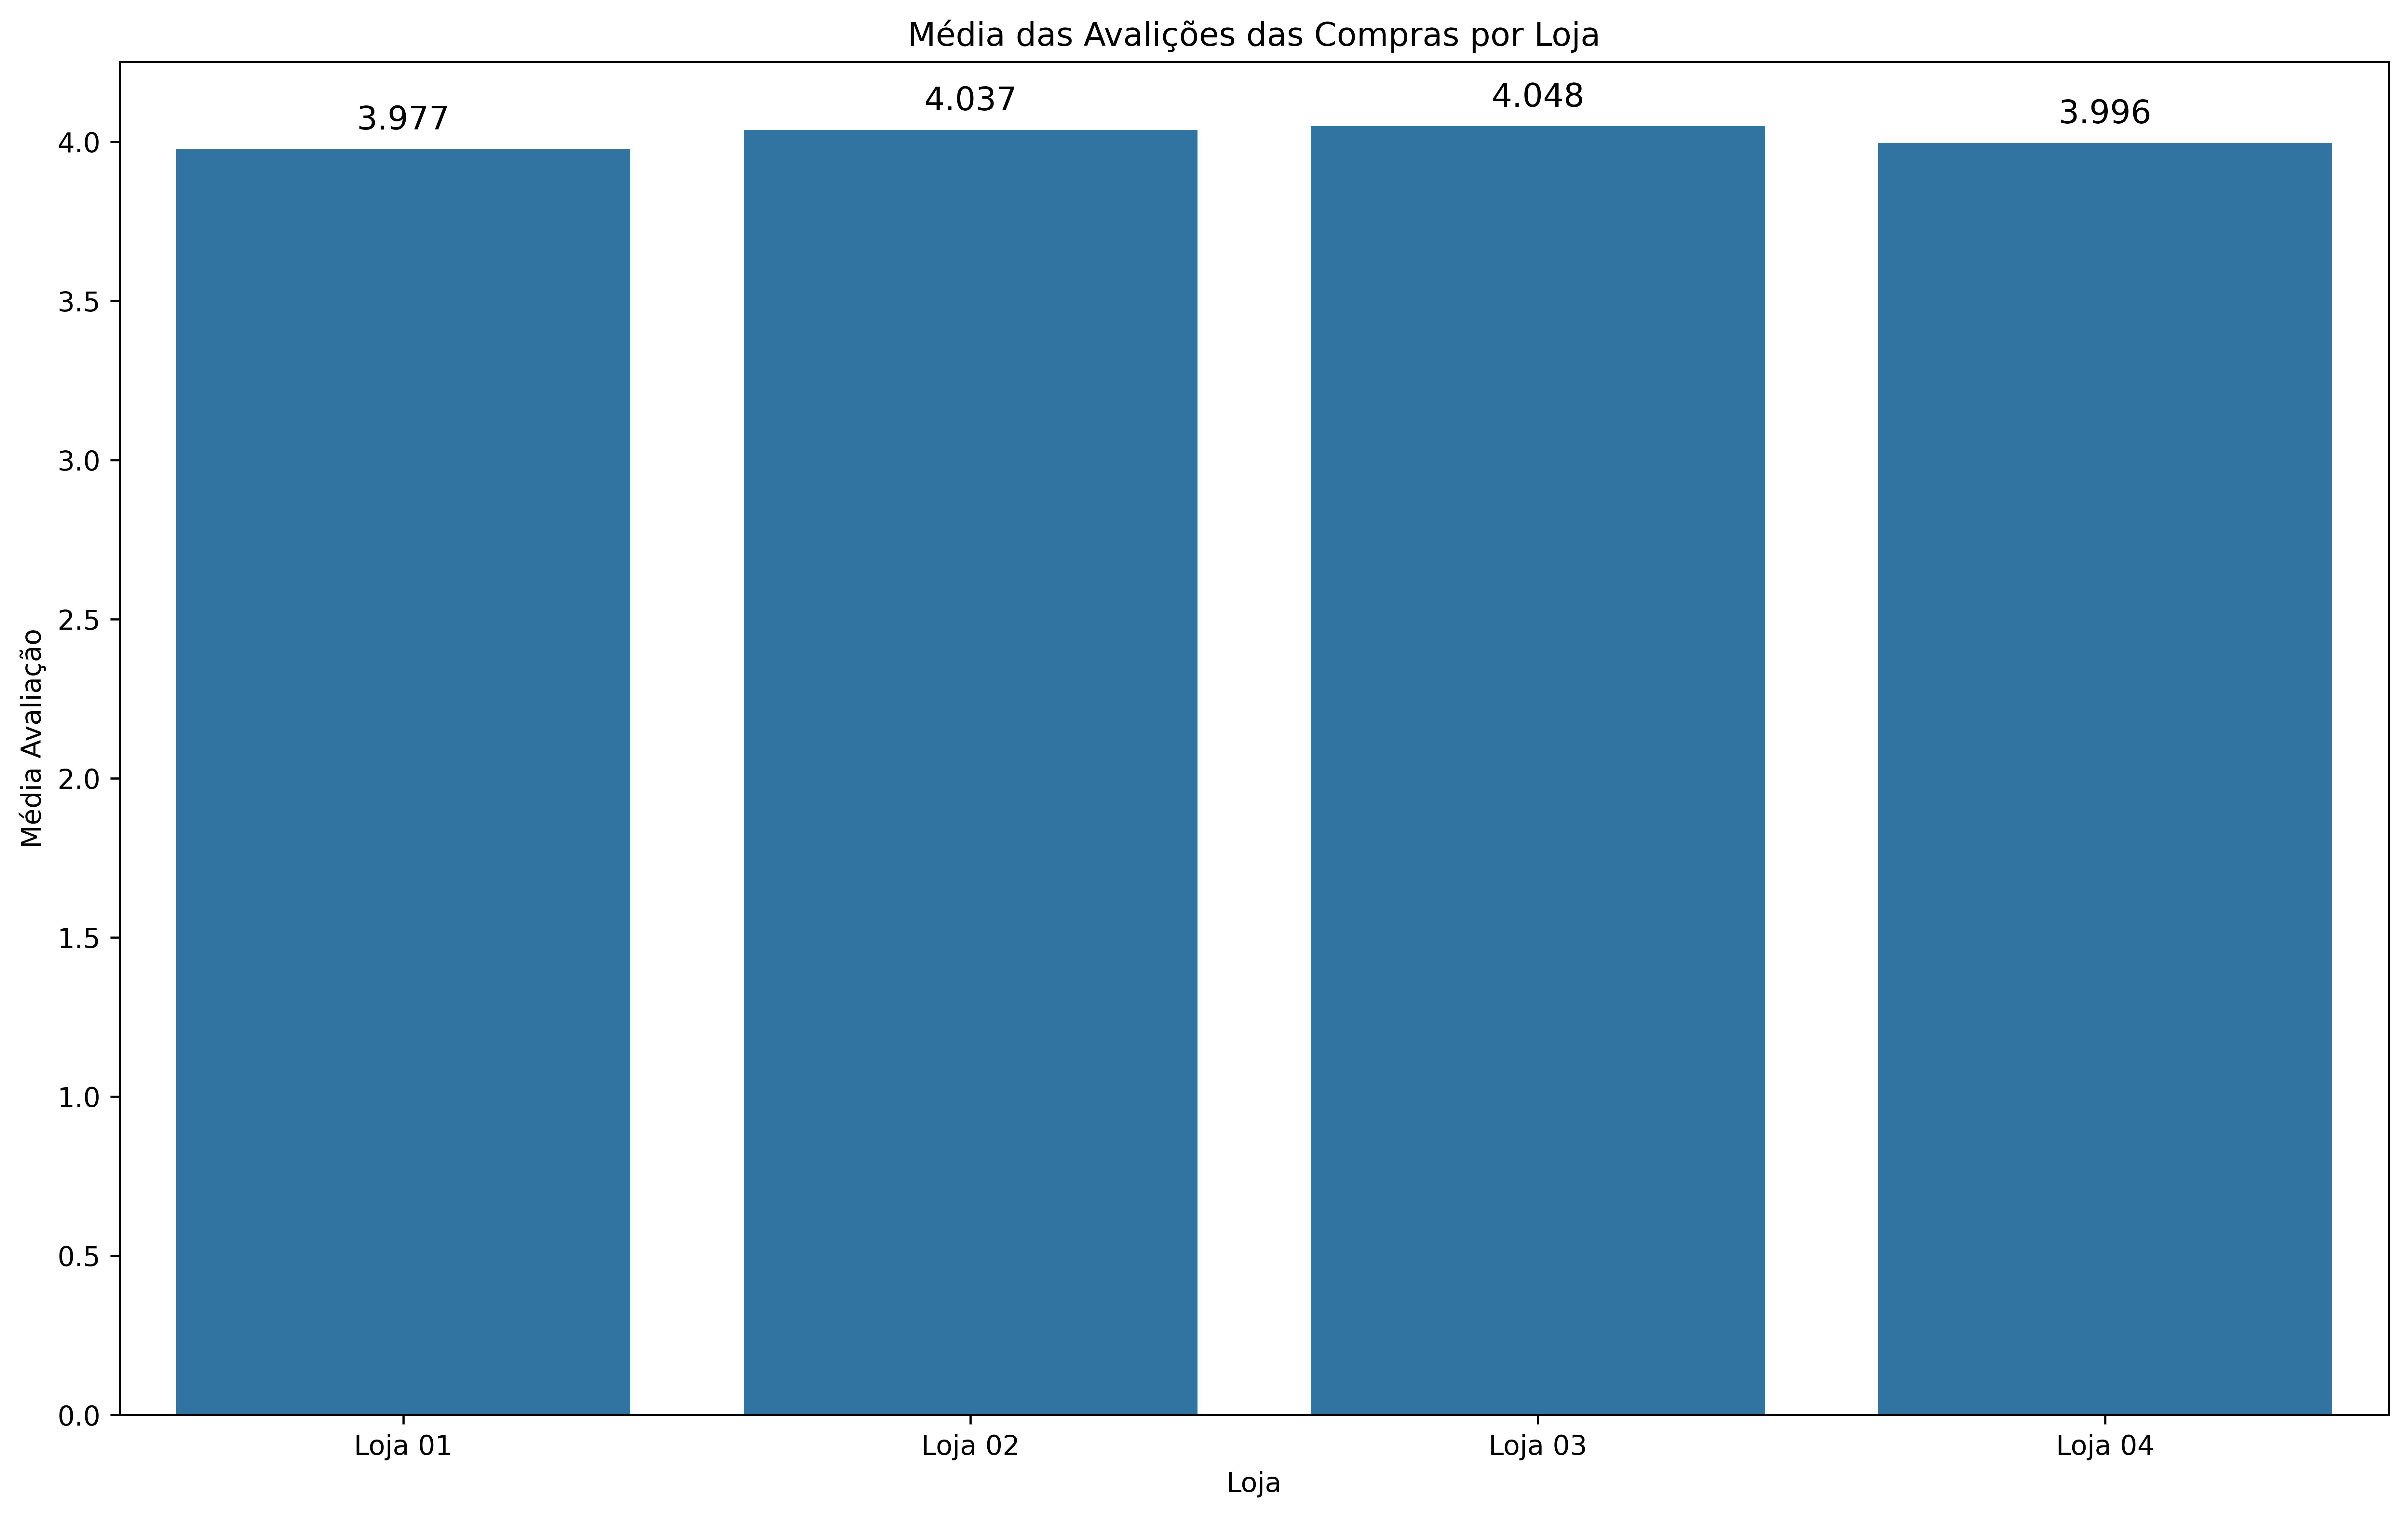

In [13]:
avaliacao = tabela_lojas.groupby('Loja') ['Avaliação da compra'].mean().reset_index(name='Média Avaliação')
print(avaliacao)

graf_avaliacao = pd.DataFrame(avaliacao)

plt.figure(figsize=(15,9), dpi=600)
sns.barplot(data=graf_avaliacao, x='Loja', y='Média Avaliação')
for index, row in graf_avaliacao.iterrows():
    plt.text(index, row['Média Avaliação'] + 0.01 * graf_avaliacao['Média Avaliação'].max(),
             f"{row['Média Avaliação']:,.3f}",
             ha='center', va='bottom', fontsize=12)
plt.title('Média das Avalições das Compras por Loja')
plt.show()

## Produtos mais vendidos e os menos vendidos em cada loja.

In [19]:
# Agrupando por loja e produto para contar quantas vezes cada produto foi vendido
qtd_vendida = tabela_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')


# Identificando o produto mais e menos vendido por loja
mais_vendidos_por_loja = qtd_vendida.loc[qtd_vendida.groupby('Loja')['Quantidade'].idxmax()]
menos_vendidos_por_loja = qtd_vendida.loc[qtd_vendida.groupby('Loja')['Quantidade'].idxmin()]

print("Produtos mais vendidos por loja:\n", mais_vendidos_por_loja)
print("\nProdutos menos vendidos por loja:\n", menos_vendidos_por_loja)

Produtos mais vendidos por loja:
         Loja                   Produto  Quantidade
24   Loja 01             Guarda roupas          60
79   Loja 02  Iniciando em programação          65
134  Loja 03             Kit banquetas          57
161  Loja 04                  Cama box          62

Produtos menos vendidos por loja:
         Loja            Produto  Quantidade
11   Loja 01       Celular ABXY          33
82   Loja 02  Jogo de tabuleiro          32
105  Loja 03   Blocos de montar          35
178  Loja 04           Guitarra          33


## Custo médio de frete para cada loja

Loja 1 média de frete: 34.692
Loja 2 média de frete: 33.622
Loja 3 média de frete: 33.074
Loja 4 média de frete: 31.279


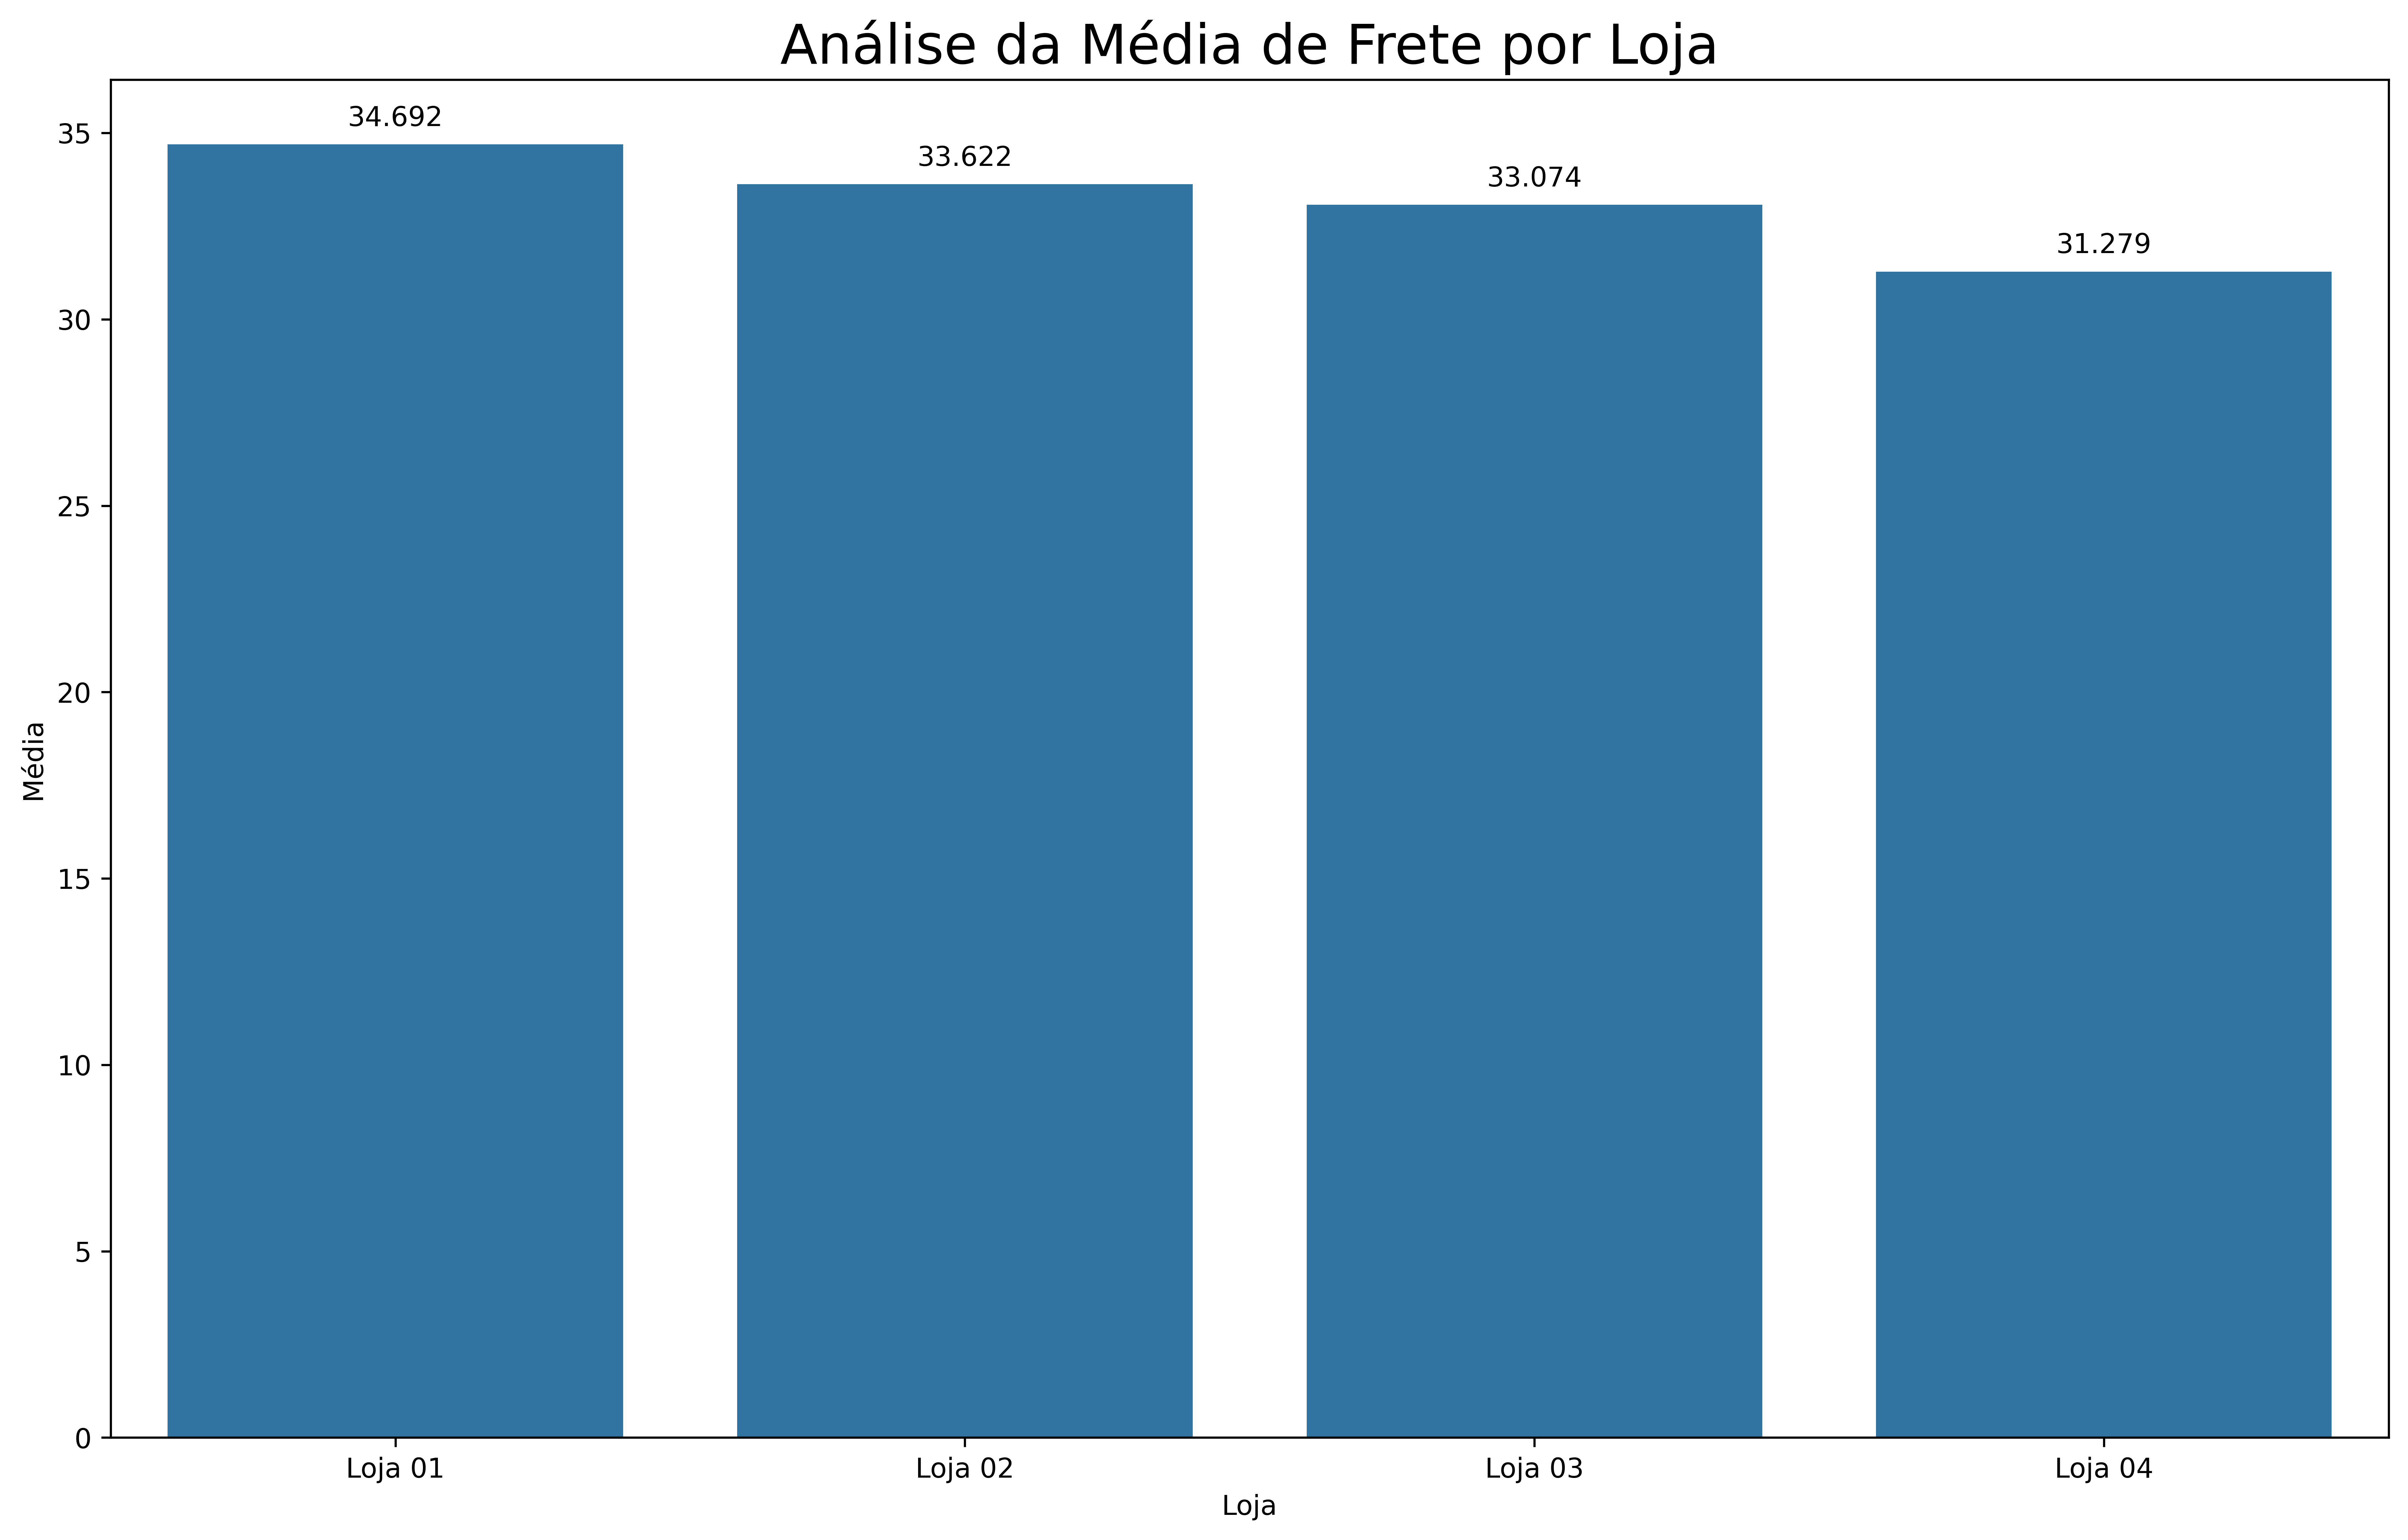

In [15]:
media = tabela_lojas.groupby('Loja') ['Frete'].mean().reset_index(name='Média')
var_loja = 0
for valor in media['Média']:
    var_loja += 1
    print(f"Loja {var_loja} média de frete: {round(valor, 3)}")

plt.figure(figsize=(15,9), dpi=600)
sns.barplot(data=media, x='Loja', y='Média')
for index, row in media.iterrows():
    plt.text(index, row['Média'] +0.01 * media['Média'].max(),
             f"{row['Média']:,.3f}", ha='center', va='bottom')

plt.title('Análise da Média de Frete por Loja',fontsize=20)
plt.show()

##**Análise dos Dados:**

Com base nos dados fornecidos e nas análises realizadas, observamos o seguinte:

*   **Faturamento Total:** A Loja 01 apresenta o maior faturamento total, seguida pela Loja 02, Loja 03 e Loja 04.

*   **Vendas por Categoria:** A análise por categoria de produto mostra que as categorias "moveis" e "eletronicos" são as mais vendidas em todas as lojas. A Loja 03 se destaca na venda de "moveis", enquanto a Loja 04 tem uma boa performance em "brinquedos".

*   **Média das Avaliações:** A Loja 03 possui a maior média de avaliação dos clientes, indicando maior satisfação, seguida pela Loja 02, Loja 04 e Loja 01.

*   **Produtos Mais e Menos Vendidos:** Identificamos os produtos de maior e menor venda em cada loja. Isso pode indicar a popularidade de certos itens e áreas que precisam de atenção.

*   **Frete Médio:** A Loja 04 apresenta o menor custo médio de frete, o que pode ser um diferencial para os clientes. A Loja 01 tem o maior custo médio de frete.

##**Conclusão e Recomendação:**

Considerando todos os fatores analisados, a **Loja 01** é a mais indicada para ser vendida. A Loja 01, apesar do maior faturamento, tem o maior custo de frete e a menor média de avaliação, sugerindo possíveis problemas operacionais ou de qualidade que podem impactar a lucratividade e a satisfação do cliente a longo prazo. As Lojas 02 e 03 apresentam um desempenho intermediário nos indicadores analisados.

Embora não tenha o maior faturamento, a **Loja 04** se destaca por ter o menor custo médio de frete e uma boa média de avaliação dos clientes, o que pode indicar uma operação mais eficiente e clientes mais satisfeitos. Além disso, a Loja 04 tem uma performance notável na categoria "brinquedos", que pode ser um nicho de mercado interessante.



Portanto, a venda da Loja 01 permitiria ao Senhor João desinvestir de uma operação com custos de frete maiores e uma base de clientes relativamente insatisfeita e focar nas demais lojas com maior potencial de crescimento sustentável.